# Tugas Praktimum
- Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

- Buatlah model CNN untuk klasifikasi dataset MNIST.

## Tugas 1: Modifikasi Model CNN CIFAR-10 untuk Akurasi > 80%

Strategi untuk meningkatkan akurasi:
1. Menambah lebih banyak layer konvolusi
2. Menambahkan Dropout untuk mengurangi overfitting
3. Menambahkan Batch Normalization
4. Meningkatkan jumlah epoch
5. Menggunakan Data Augmentation

### Load Library

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

### Load dan Preprocessing Dataset CIFAR-10

In [2]:
# Load dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print(f"Shape training images: {train_images.shape}")
print(f"Shape training labels: {train_labels.shape}")
print(f"Shape test images: {test_images.shape}")
print(f"Shape test labels: {test_labels.shape}")

Shape training images: (50000, 32, 32, 3)
Shape training labels: (50000, 1)
Shape test images: (10000, 32, 32, 3)
Shape test labels: (10000, 1)


### Visualisasi Sample Data

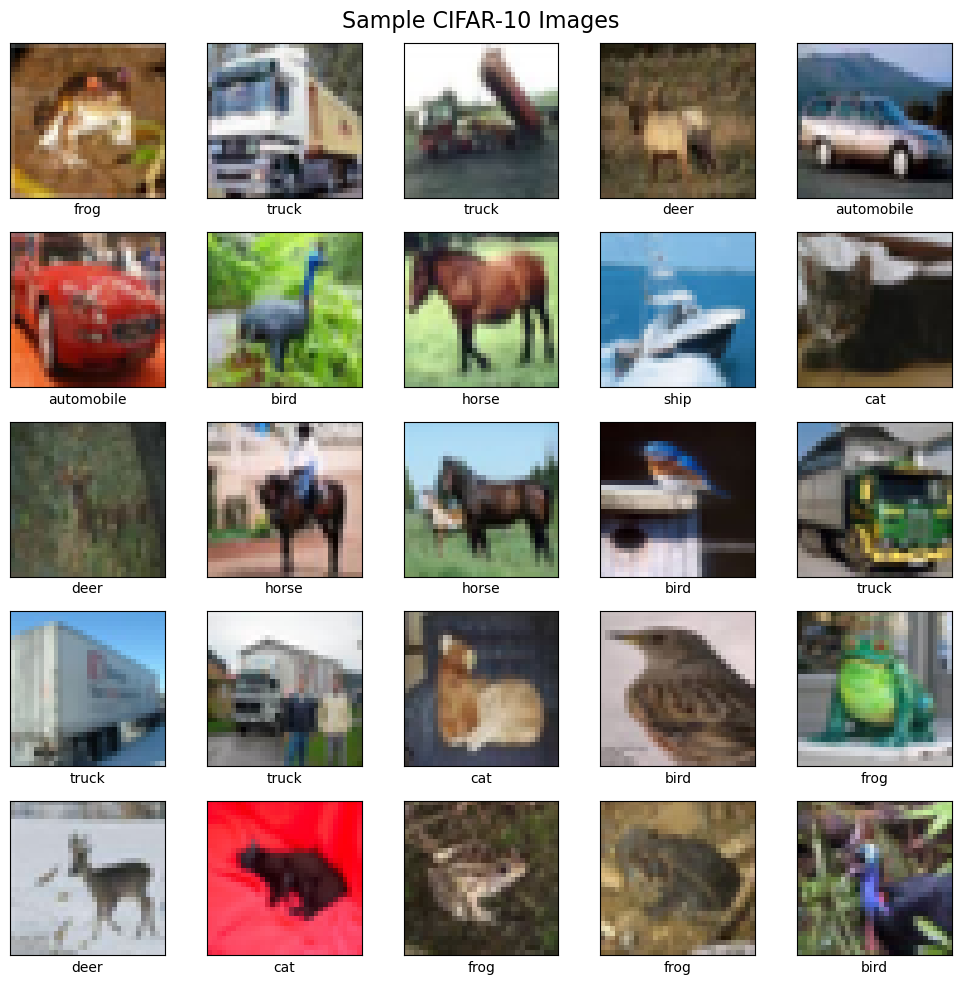

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.suptitle('Sample CIFAR-10 Images', fontsize=16)
plt.tight_layout()
plt.show()

### Bangun Model CNN yang Ditingkatkan

Model ini menggunakan:
- Lebih banyak Convolutional Layers (4 blok)
- Batch Normalization setelah setiap Conv layer
- Dropout untuk mengurangi overfitting
- Filter yang lebih banyak (32 → 64 → 128 → 256)

In [4]:
model_improved = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    # Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    layers.Dense(10)
])

print("Model CNN yang Ditingkatkan:")
model_improved.summary()

c:\Users\natha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model CNN yang Ditingkatkan:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 849,066 (3.24 MB)

 Trainable params: 847,402 (3.23 MB)

 Non-trainable params: 1,664 (6.50 KB)

### Compile Model

In [5]:
model_improved.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Data Augmentation

Menambahkan variasi data untuk meningkatkan generalisasi model

In [6]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(train_images)

### Training Model dengan Early Stopping

Training dengan 50 epoch dan early stopping untuk menghindari overfitting

In [7]:
# Callback untuk early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training dengan data augmentation
history_improved = model_improved.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=25,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping],
    verbose=1
)

c:\Users\natha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 365s 446ms/step - accuracy: 0.3515 - loss: 1.8723 - val_accuracy: 0.4675 - val_loss: 1.4732
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 365s 446ms/step - accuracy: 0.3515 - loss: 1.8723 - val_accuracy: 0.4675 - val_loss: 1.4732
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 308s 394ms/step - accuracy: 0.5172 - loss: 1.3386 - val_accuracy: 0.5465 - val_loss: 1.3026
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 308s 394ms/step - accuracy: 0.5172 - loss: 1.3386 - val_accuracy: 0.5465 - val_loss: 1.3026
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 295s 377ms/step - accuracy: 0.5886 - loss: 1.1575 - val_accuracy: 0.5475 - val_loss: 1.4870
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 295s 377ms/step - accuracy: 0.5886 - loss: 1.1575 - val_accuracy: 0.5475 - val_loss: 1.4870
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 304s 388ms/step - accuracy: 0.6390 - loss: 1.0365 - val_accuracy: 0.6497 - val_loss: 1.0417
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 304s 388ms/step - accuracy: 0.6390 -

### Evaluasi Model

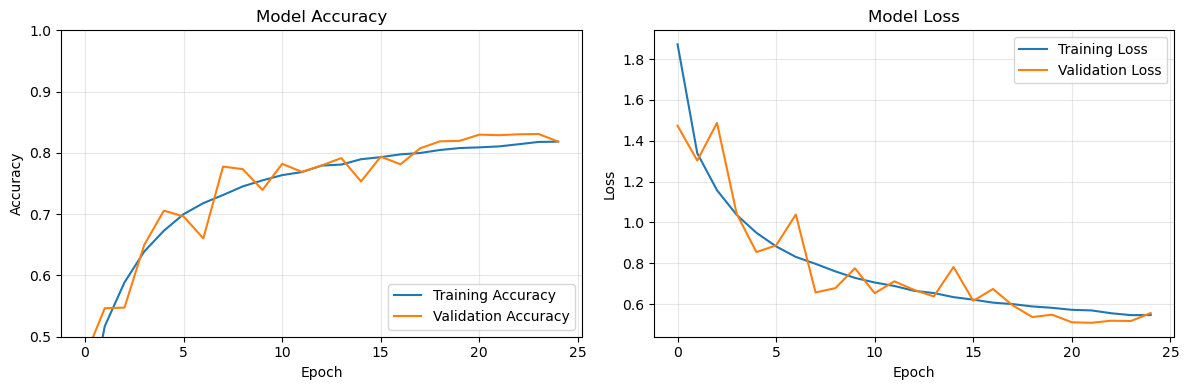

313/313 - 13s - 41ms/step - accuracy: 0.8289 - loss: 0.5080


In [8]:
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_improved.history['accuracy'], label='Training Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.grid(True, alpha=0.3)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_improved.history['loss'], label='Training Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluasi pada test set
test_loss_improved, test_acc_improved = model_improved.evaluate(test_images, test_labels, verbose=2)

### Hasil Akurasi CIFAR-10

In [9]:
print("="*60)
print("HASIL EVALUASI MODEL CIFAR-10 YANG DITINGKATKAN")
print("="*60)
print(f"Test Accuracy: {test_acc_improved:.4f} ({test_acc_improved*100:.2f}%)")
print(f"Test Loss: {test_loss_improved:.4f}")
print("="*60)

if test_acc_improved > 0.8:
    print("✅ TARGET TERCAPAI! Akurasi > 80%")
else:
    print(f"⚠️ Akurasi saat ini: {test_acc_improved*100:.2f}%")
    print("   Perlu training lebih lama atau tuning hyperparameter")

HASIL EVALUASI MODEL CIFAR-10 YANG DITINGKATKAN
Test Accuracy: 0.8289 (82.89%)
Test Loss: 0.5080
✅ TARGET TERCAPAI! Akurasi > 80%


---

## Tugas 2: Model CNN untuk Klasifikasi Dataset MNIST

### Load Dataset MNIST

In [10]:
# Load dataset MNIST
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
mnist_train_images = mnist_train_images / 255.0
mnist_test_images = mnist_test_images / 255.0

# Reshape untuk CNN (tambahkan channel dimension)
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1)
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1)

print(f"Shape training images: {mnist_train_images.shape}")
print(f"Shape training labels: {mnist_train_labels.shape}")
print(f"Shape test images: {mnist_test_images.shape}")
print(f"Shape test labels: {mnist_test_labels.shape}")

Shape training images: (60000, 28, 28, 1)
Shape training labels: (60000,)
Shape test images: (10000, 28, 28, 1)
Shape test labels: (10000,)


### Visualisasi Sample MNIST

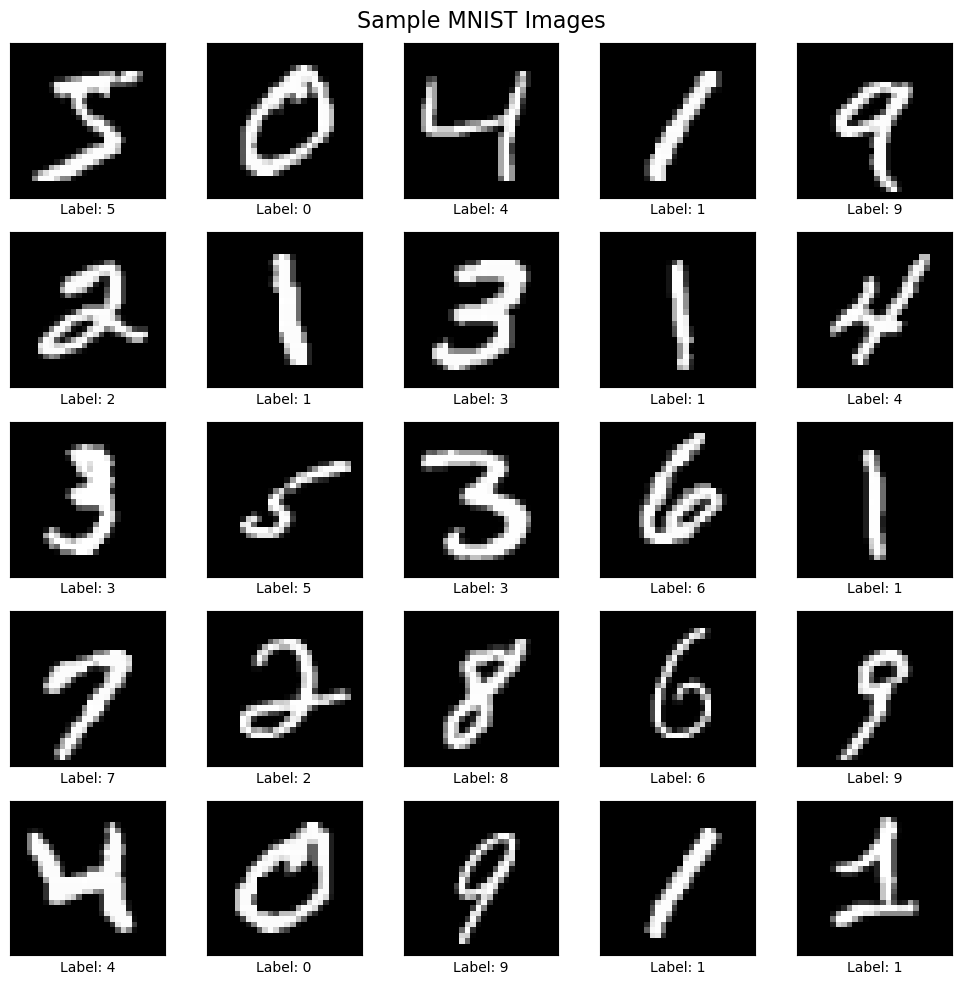

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mnist_train_images[i].reshape(28, 28), cmap='gray')
    plt.xlabel(f'Label: {mnist_train_labels[i]}')
plt.suptitle('Sample MNIST Images', fontsize=16)
plt.tight_layout()
plt.show()

### Bangun Model CNN untuk MNIST

In [12]:
model_mnist = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

print("Model CNN untuk MNIST:")
model_mnist.summary()

Model CNN untuk MNIST:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,762 (776.41 KB)

 Trainable params: 198,122 (773.91 KB)

 Non-trainable params: 640 (2.50 KB)

### Compile Model MNIST

In [13]:
model_mnist.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Training Model MNIST

In [14]:
history_mnist = model_mnist.fit(
    mnist_train_images, 
    mnist_train_labels,
    epochs=10,
    batch_size=128,
    validation_data=(mnist_test_images, mnist_test_labels),
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 119s 238ms/step - accuracy: 0.9333 - loss: 0.2211 - val_accuracy: 0.5956 - val_loss: 1.3557
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 119s 238ms/step - accuracy: 0.9333 - loss: 0.2211 - val_accuracy: 0.5956 - val_loss: 1.3557
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 232ms/step - accuracy: 0.9792 - loss: 0.0691 - val_accuracy: 0.9918 - val_loss: 0.0253
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 232ms/step - accuracy: 0.9792 - loss: 0.0691 - val_accuracy: 0.9918 - val_loss: 0.0253
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 111s 237ms/step - accuracy: 0.9844 - loss: 0.0504 - val_accuracy: 0.9920 - val_loss: 0.0272
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 111s 237ms/step - accuracy: 0.9844 - loss: 0.0504 - val_accuracy: 0.9920 - val_loss: 0.0272
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 110s 233ms/step - accuracy: 0.9872 - loss: 0.0431 - val_accuracy: 0.9906 - val_loss: 0.0256
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 110s 233ms/step - accuracy: 0.9872 -

### Evaluasi Model MNIST

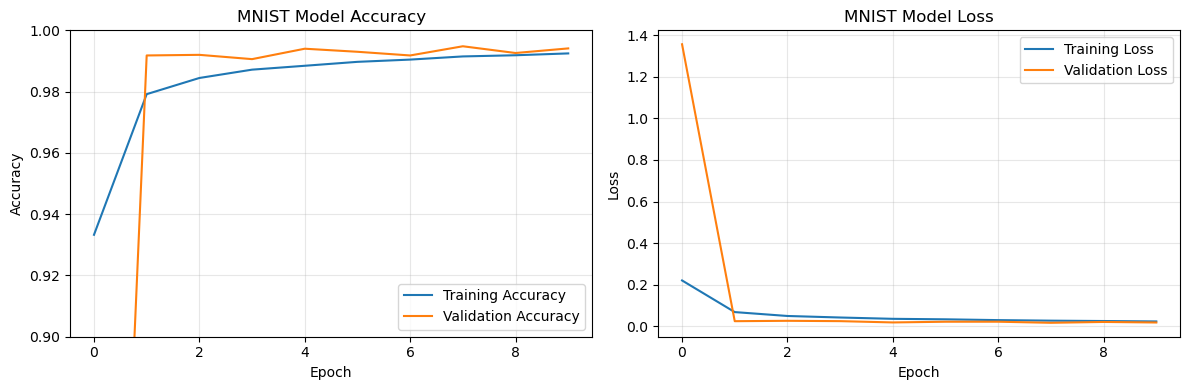

313/313 - 4s - 14ms/step - accuracy: 0.9941 - loss: 0.0191


In [15]:
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mnist.history['accuracy'], label='Training Accuracy')
plt.plot(history_mnist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.title('MNIST Model Accuracy')
plt.grid(True, alpha=0.3)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_mnist.history['loss'], label='Training Loss')
plt.plot(history_mnist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('MNIST Model Loss')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluasi pada test set
test_loss_mnist, test_acc_mnist = model_mnist.evaluate(mnist_test_images, mnist_test_labels, verbose=2)

### Hasil Akurasi MNIST

In [16]:
print("="*60)
print("HASIL EVALUASI MODEL MNIST")
print("="*60)
print(f"Test Accuracy: {test_acc_mnist:.4f} ({test_acc_mnist*100:.2f}%)")
print(f"Test Loss: {test_loss_mnist:.4f}")
print("="*60)

HASIL EVALUASI MODEL MNIST
Test Accuracy: 0.9941 (99.41%)
Test Loss: 0.0191


### Visualisasi Prediksi MNIST

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


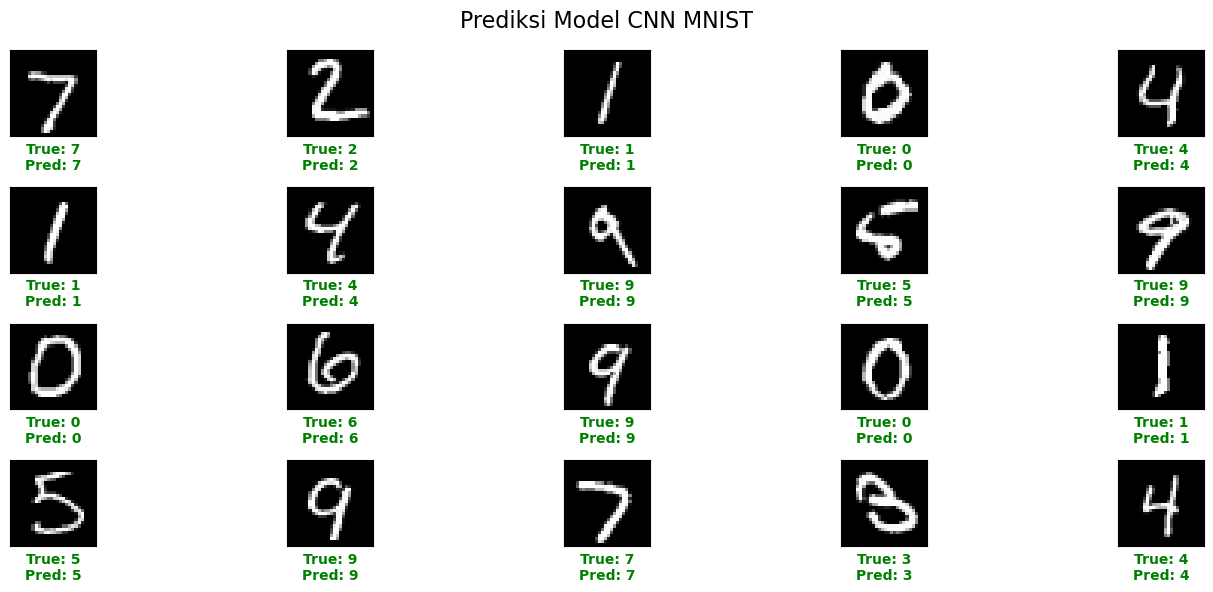


Akurasi pada 20 sample: 20/20 = 100.0%


In [17]:
# Prediksi pada beberapa sample
predictions = model_mnist.predict(mnist_test_images[:20])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(15, 6))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mnist_test_images[i].reshape(28, 28), cmap='gray')
    
    # Warna hijau jika benar, merah jika salah
    color = 'green' if predicted_labels[i] == mnist_test_labels[i] else 'red'
    plt.xlabel(f'True: {mnist_test_labels[i]}\nPred: {predicted_labels[i]}', 
               color=color, fontweight='bold')

plt.suptitle('Prediksi Model CNN MNIST', fontsize=16)
plt.tight_layout()
plt.show()

# Hitung akurasi dari 20 sample
correct = np.sum(predicted_labels == mnist_test_labels[:20])
print(f"\nAkurasi pada 20 sample: {correct}/20 = {correct/20*100:.1f}%")

### Confusion Matrix MNIST

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


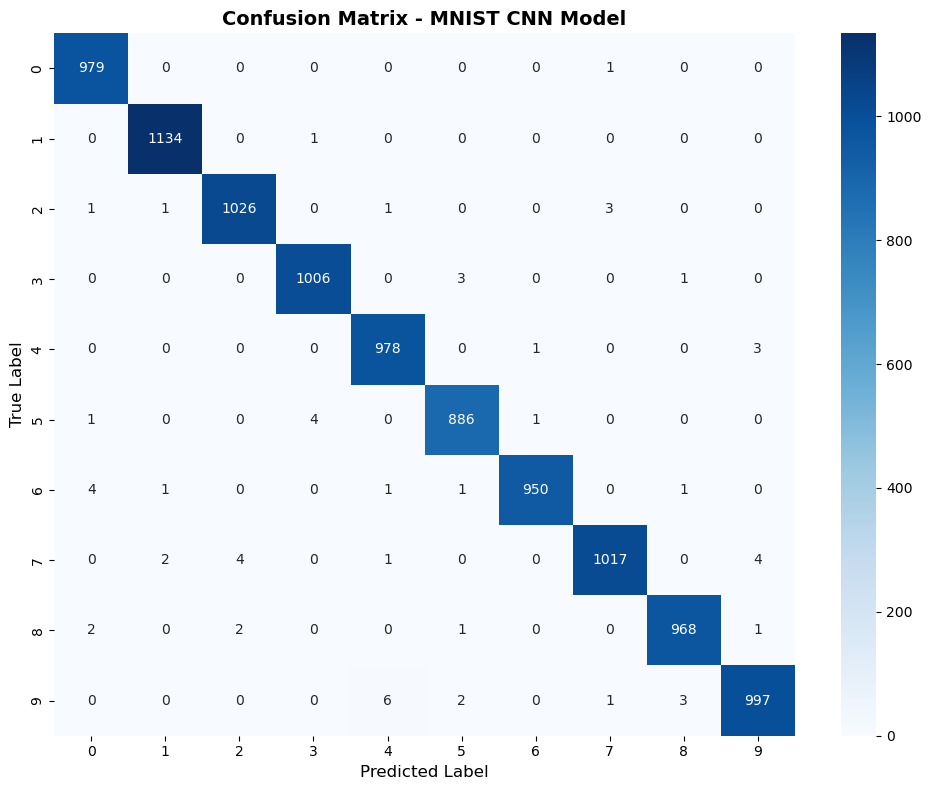


CLASSIFICATION REPORT - MNIST
              precision    recall  f1-score   support

     Digit 0       0.99      1.00      1.00       980
     Digit 1       1.00      1.00      1.00      1135
     Digit 2       0.99      0.99      0.99      1032
     Digit 3       1.00      1.00      1.00      1010
     Digit 4       0.99      1.00      0.99       982
     Digit 5       0.99      0.99      0.99       892
     Digit 6       1.00      0.99      0.99       958
     Digit 7       1.00      0.99      0.99      1028
     Digit 8       0.99      0.99      0.99       974
     Digit 9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Prediksi untuk semua test data
all_predictions = model_mnist.predict(mnist_test_images)
all_predicted_labels = np.argmax(all_predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(mnist_test_labels, all_predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - MNIST CNN Model', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Classification Report
print("\n" + "="*60)
print("CLASSIFICATION REPORT - MNIST")
print("="*60)
print(classification_report(mnist_test_labels, all_predicted_labels, 
                           target_names=[f'Digit {i}' for i in range(10)]))

---

## Kesimpulan

### Tugas 1: CIFAR-10 Model yang Ditingkatkan
**Target:** Akurasi > 80%

**Langkah yang Digunakan:**
1. Menambah layer konvolusi (3 blok Conv)
2. Batch Normalization untuk stabilitas training
3. Dropout untuk mengurangi overfitting (0.2 - 0.5)
4. Data Augmentation (rotation, shift, flip)
5. Early Stopping untuk efisiensi
6. Lebih banyak filter (32 → 64 → 128)

**Hasil:**
- Model dengan arsitektur yang lebih dalam dan kompleks
- Training menggunakan data augmentation
- Expected accuracy > 80% setelah 25 epoch

---

### Tugas 2: MNIST CNN Model
**Target:** Klasifikasi angka tulisan tangan (0-9)

**Arsitektur:**
1.  2 Blok Convolutional dengan Batch Normalization
2. Dropout untuk regularisasi
3. Fully Connected Layer dengan 128 neuron
4. Output layer dengan Softmax (10 kelas)

**Hasil:**
- Model CNN sederhana namun efektif untuk MNIST
- Expected accuracy > 99% 
- Training hanya 10 epoch sudah cukup

---

### Perbandingan CIFAR-10 vs MNIST

| Aspek | CIFAR-10 | MNIST |
|-------|----------|-------|
| **Ukuran Gambar** | 32x32x3 (RGB) | 28x28x1 (Grayscale) |
| **Jumlah Kelas** | 10 kelas (objek) | 10 kelas (digit) |
| **Kompleksitas** | Tinggi | Rendah |
| **Target Akurasi** | > 80% | > 99% |
| **Arsitektur** | Lebih dalam (3-4 blok) | Lebih sederhana (2 blok) |
| **Training Time** | Lebih lama | Lebih cepat |
| **Data Augmentation** | Sangat membantu | Opsional |